In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def my_update_function(capital, exposure, total_exposure):
    return exposure if capital < exposure else (exposure - capital*exposure/total_exposure)

In [2]:
class LiabilityNetwork:
    
    def __init__(self, size):
        self.size = size
        self.liabilities = np.zeros((size, size))
#         self.update_function = my_update_function
        self.update_function = lambda capital, exposure, total_exposure: exposure if capital < exposure else (exposure - capital*exposure/total_exposure)

    def step(self):
        # Randomly select defaulted institution
        default = np.random.randint(self.size)
        
        # Remove capital from default
        self.liabilities[default, default] = 0
        
        # Calculate if bailed out
        bailout = np.random.randint(2)
        
        # TODO: handle bailout

        # Get defaults
        defaults = [i for i in range(self.size) if self.liabilities[i, i] == 0]
        num_defaults = -1  # just need an initial value to get into while loop
        while num_defaults != 0:  # iterate until "stable"
            num_defaults = 0
            for i in range(self.size):
                capital = self.liabilities[i, i]
                total_exposure = self.liabilities[i, :].sum() - capital
                defaulted = capital == 0 or any([(capital - self.liabilities[i, j]) < 0 for j in defaults])

                if not defaulted:
                    for j in range(self.size):
                        if j in defaults:
                            pass
                        else:
                            exposure = self.liabilities[i, j]
                            self.liabilities[i, j] = self.update_function(capital, exposure, total_exposure)
                else:
                    self.liabilities[i, i] = 0
                    defaults.append(i)
                    num_defaults += 1
        return defaults

In [3]:
class SimpleNetwork:
    
    def __init__(self, size, liabilities=None, recovery_rate=0.0):
        self.size = size
        self.liabilities = liabilities if liabilities is not None else np.zeros((size, size))
        self.recovery_rate = recovery_rate

    def reset_net(self):
        for i in range(self.size):
            for j in range(i + 1, self.size):
                self.liabilities[i, j] = max(self.liabilities[i, j] - self.liabilities[j, i], 0)
                self.liabilities[j, i] = max(self.liabilities[j, i] - self.liabilities[i, j], 0)

    def default(self, i):
        self.liabilities[i, i] = 0

    def recover(self, i):
        for j in range(self.size):
            if i != j:
                self.liabilities[j, j] += self.recovery_rate * self.liabilities[j, i]
                self.liabilities[j, i] = 0

    def step(self):
        for i in range(self.size):
            capital = self.liabilities[i, i]
            assets = self.liabilities[i, :].sum()
            liabilities = self.liabilities[:, i].sum()
            net = capital + assets - liabilities
            print(i, assets, liabilities, capital, net)
            if net < 0:
                self.default(i)
                self.recover(i)

    def show(self):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.set_aspect('equal')
        plt.imshow(self.liabilities, interpolation='nearest', cmap=plt.cm.hot)
        plt.colorbar()
        plt.show()

In [ ]:
test_liabilities = np.zeros((3, 3))
test_liabilities[0, 0] = 1
test_liabilities[0, 1] = 4
test_liabilities[1, 1] = 1
test_liabilities[1, 2] = 1
test_liabilities[2, 0] = 5
test_liabilities[2, 2] = 2

test_m = np.random.randint(10, size=(9250, 9250))

In [ ]:
sn = SimpleNetwork(9250, test_m)
sn.show()

(0, 450, 452, 5, 3)
(1, 457, 460, 4, 1)
(2, 415, 409, 9, 15)
(3, 446, 393, 4, 57)
(4, 438, 430, 4, 12)
(5, 401, 472, 2, -69)
(6, 432, 455, 9, -14)
(7, 433, 486, 2, -51)
(8, 435, 450, 5, -10)
(9, 432, 460, 6, -22)
(10, 471, 425, 2, 48)
(11, 464, 469, 3, -2)
(12, 409, 427, 6, -12)
(13, 397, 466, 8, -61)
(14, 458, 411, 5, 52)
(15, 370, 443, 8, -65)
(16, 401, 428, 9, -18)
(17, 393, 425, 2, -30)
(18, 379, 471, 4, -88)
(19, 433, 487, 1, -53)
(20, 381, 480, 7, -92)
(21, 451, 464, 5, -8)
(22, 341, 489, 5, -143)
(23, 395, 466, 7, -64)
(24, 370, 459, 9, -80)
(25, 387, 437, 6, -44)
(26, 362, 442, 6, -74)
(27, 353, 438, 4, -81)
(28, 365, 429, 6, -58)
(29, 367, 451, 1, -83)
(30, 366, 456, 3, -87)
(31, 356, 469, 2, -111)
(32, 327, 451, 4, -120)
(33, 317, 423, 1, -105)
(34, 339, 452, 0, -113)
(35, 356, 462, 3, -103)
(36, 338, 435, 5, -92)
(37, 298, 470, 7, -165)
(38, 290, 490, 1, -199)
(39, 300, 442, 9, -133)
(40, 308, 392, 5, -79)
(41, 309, 476, 2, -165)
(42, 300, 423, 0, -123)
(43, 337, 448, 8, -10

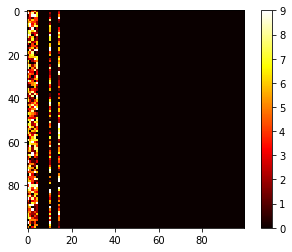

In [6]:
sn.step()
sn.show()

(0, 5.0, 6.0, 1.0, 0.0)
(1, 0.0, 4.0, 0.0, -4.0)
(2, 7.0, 2.0, 2.0, 7.0)


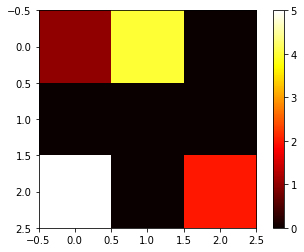

In [13]:
sn.step()
sn.show()

(0, 5.0, 6.0, 1.0, 0.0)
(1, 0.0, 4.0, 0.0, -4.0)
(2, 7.0, 2.0, 2.0, 7.0)


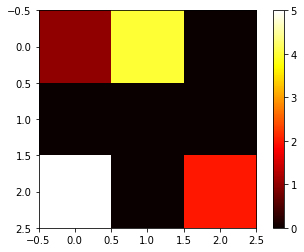

In [17]:
sn.step()
sn.show()